Linear Regression model contains 1 independent variable whereas Multiple Regression model contains many independent variables.

In [1]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_excel('Trucking.xlsx')
df1

,Driving Assignmnet,x1,n_of_deliveries,travel_time
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2
5,6,80,2,6.2
6,7,75,3,7.4
7,8,65,4,6.0
8,9,90,3,7.6
9,10,90,2,6.1


Text(0.5, 1.0, 'Simple linear regression with Miles Travelled')

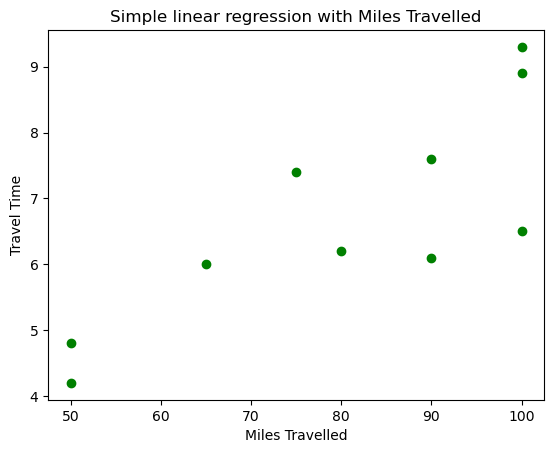

In [3]:
import matplotlib.pyplot as plt
plt.scatter(df1['x1'],df1['travel_time'], color="green")
plt.ylabel('Travel Time')
plt.xlabel('Miles Travelled')
plt.title("Simple linear regression with Miles Travelled")
# plot the scatter plot using matplotlib

Text(0.5, 1.0, 'Linear regression with no. of deliveries')

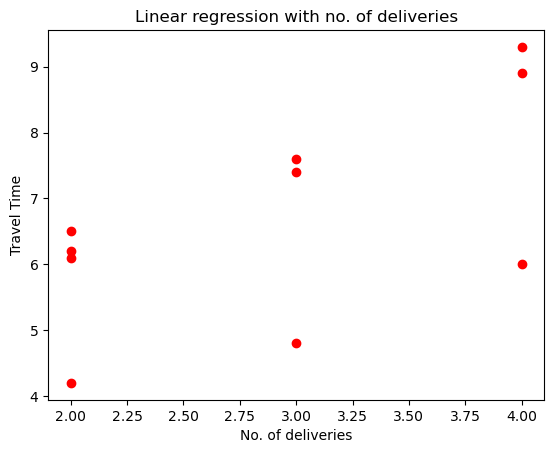

In [4]:
plt.scatter(df1['n_of_deliveries'], df1['travel_time'], color="red")
plt.ylabel('Travel Time')
plt.xlabel('No. of deliveries')
plt.title("Linear regression with no. of deliveries")
# no. of deliveries is independent variable and travel time is dependent 
# variable there also seems to be positive correlation.
# if there is no correlation between dependent and independent variable we 
# do not need to do regression analysis

Text(0.5, 1.0, 'Multiple Regression')

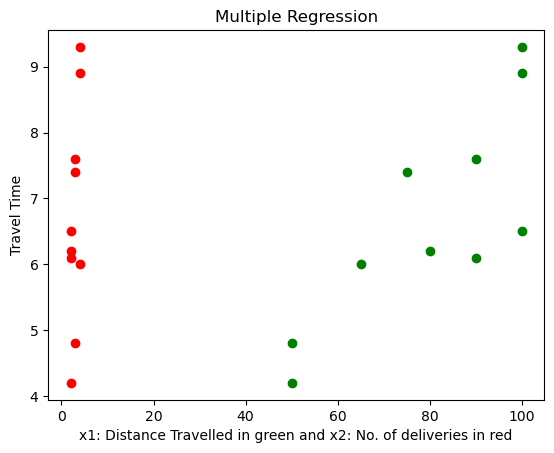

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df1['x1'],df1['travel_time'], color="green")
plt.scatter(df1['n_of_deliveries'],df1['travel_time'], color="red")
plt.ylabel('Travel Time')
plt.xlabel('x1: Distance Travelled in green and x2: No. of deliveries in red')
plt.title('Multiple Regression')

In [6]:
Reg1 = ols(formula = "travel_time ~ x1", data = df1)
Fit1 = Reg1.fit()
Fit1.summary()

# Higher the R-Squared better the model 0.664 means 66.4% of variability of y 
# can be explained with the help of this model

D:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            travel_time   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Sun, 27 Aug 2023   Prob (F-statistic):            0.00408
Time:                        14:25:38   Log-Likelihood:                -13.092
No. Observations:                  10   AIC:                             30.18
Df Residuals:                       8   BIC:                             30.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2739      1.401      0.909      0.390      -1.956       4.504
x1             0.0678      0.017      3.977      0.004       0.028       0.107
==============================================================================
Omnibus:                        0.694   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.707   Jarque-Bera (JB):                0.623
Skew:                          -0.333   Prob(JB):                        0.732
Kurtosis:                       1.974   Cond. No.                         363.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
from statsmodels.formula.api import ols
model = ols('travel_time ~ x1 +  n_of_deliveries', data = df1).fit()
model.summary()
# (x1 + n_of_delivieries) is a way to do multiple regression
# R-Squared is now 0.904 so adding a new variable helps it 
# to increase the explaining power 

# Adjusted R-Square: Look at p-value for each independent variable. 
# now null hypothesis H0:beta1=beta2=0. So in all hypothesis look at the 
# p-value here ie, 0.000 So you have to reject null hypothesis and beta1!=0
# that means there is a relation between x1 and y1
# similarly look at the p-values of n_of_deliveries ie, 0.004 (<0.05) so 
# reject null hypothesis so beta2=0 so at the population level ther is a 
# significant relationship means even at the population level between x2 and 
# y there is a significant relationship 

D:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            travel_time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           0.000276
Time:                        14:25:39   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8687      0.952     -0.913      0.392      -3.119       1.381
x1                  0.0611      0.010      6.182      0.000       0.038       0.085
n_of_deliveries     0.9234      0.221      4.176      0.004       0.401       1.446
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   2.515
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.151
Skew:                           0.074   Prob(JB):                        0.927
Kurtosis:                       2.418   Cond. No.                         435.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In above and below table SST1=SST2=(AROUND 22), (SSE1=8.)>(SSE2=2.29) and (SSR1=15.871)<(SSR2=15.87+5.72=21.59). So when you introduced a new variable the value of SSR increases and SSE value decreases. This is the advantage of using more no. of independent variable to have a more accurate model

In [8]:
anova_lm(Fit1)

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,15.871304,15.871304,15.814578,0.00408
Residual,8.0,8.028696,1.003587,NaN,NaN


In [9]:
# ANOVA Regression Table
anova_table = anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,15.871304,15.871304,48.315660,0.000221
n_of_deliveries,1.0,5.729252,5.729252,17.441075,0.004157
Residual,7.0,2.299443,0.328492,NaN,NaN


Whenever you introduce a new variable then R-squared and Adjusted R-Squared value increases

beta0, beta1, beta2, R-squared, adjusted R-squared

# Lec-34 Multiple Regression - II

In this lecture: Significance test using F-Test and T-Test, like simple regression it will have some hypothesis about beta1 coeff and beta2 coeff and so on. Then we'll test whether beta1=0 or !=0. 

In [10]:
Reg2 = ols(formula = "travel_time ~ x1 + n_of_deliveries", data=df1)
Fit2 = Reg2.fit()
Fit2.summary()

D:\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            travel_time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Sun, 27 Aug 2023   Prob (F-statistic):           0.000276
Time:                        14:25:39   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8687      0.952     -0.913      0.392      -3.119       1.381
x1                  0.0611      0.010      6.182      0.000       0.038       0.085
n_of_deliveries     0.9234      0.221      4.176      0.004       0.401       1.446
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   2.515
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.151
Skew:                           0.074   Prob(JB):                        0.927
Kurtosis:                       2.418   Cond. No.                         435.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
anova_lm(Fit2)

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,15.871304,15.871304,48.315660,0.000221
n_of_deliveries,1.0,5.729252,5.729252,17.441075,0.004157
Residual,7.0,2.299443,0.328492,NaN,NaN
